<a href="https://colab.research.google.com/github/rselent/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module4-make-explanatory-visualizations/1_4_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












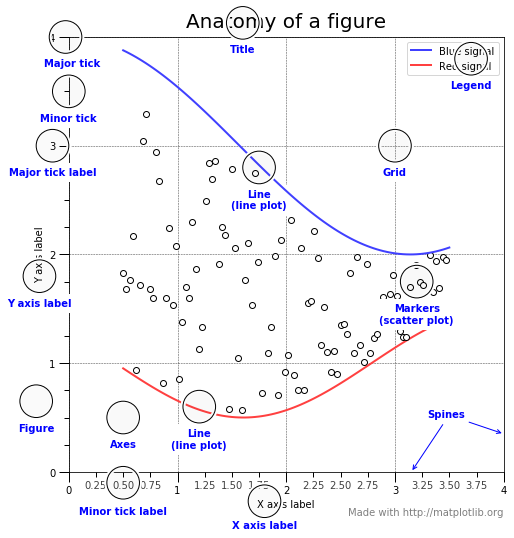

In [6]:
## Anatomy of a Figure

### Oh, I didn't have to do this... Oh well... ¯\_(ツ)_/¯

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, FuncFormatter, MultipleLocator


np.random.seed( 19680801)

X = np.linspace( 0.5, 3.5, 100)
Y1 = 3+np.cos( X)
Y2 = 1+np.cos( 1 + X / 0.75 ) / 2
Y3 = np.random.uniform( Y1, Y2, len( X))

fig = plt.figure( figsize=( 8, 8))
ax = fig.add_subplot( 1, 1, 1, aspect= 1)


def minor_tick( x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x

ax.xaxis.set_major_locator( MultipleLocator( 1.000))
ax.xaxis.set_minor_locator( AutoMinorLocator( 4))
ax.yaxis.set_major_locator( MultipleLocator( 1.000))
ax.yaxis.set_minor_locator( AutoMinorLocator( 4))
ax.xaxis.set_minor_formatter( FuncFormatter( minor_tick))

ax.set_xlim( 0, 4)
ax.set_ylim( 0, 4)

ax.tick_params( which= 'major', width= 1.0)
ax.tick_params( which= 'major', length= 10)
ax.tick_params( which= 'minor', width= 1.0, labelsize= 10)
ax.tick_params( which= 'minor', length= 5, labelsize= 10, labelcolor= '0.25')

ax.grid( linestyle= '--', linewidth= 0.5, color= '.25', zorder= -10)

ax.plot( X, Y1, c=( 0.25, 0.25, 1.00), lw= 2, label= 'Blue signal', zorder= 10)
ax.plot( X, Y2, c=( 1.00, 0.25, 0.25), lw= 2, label= 'Red signal')
ax.plot( X, Y3, linewidth= 0,
        marker= 'o', markerfacecolor= 'w', markeredgecolor= 'k')

ax.set_title( 'Anatomy of a figure', fontsize= 20, verticalalignment= 'bottom')
ax.set_xlabel( 'X axis label')
ax.set_ylabel('Y axis label')

ax.legend()


def circle( x, y, radius= 0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle(( x, y), radius, clip_on= False, zorder= 10, linewidth= 1,
                    edgecolor= 'black', facecolor=( 0, 0, 0, .0125),
                    path_effects=[ withStroke( linewidth= 5, foreground= 'w')])
    ax.add_artist( circle)


def text( x, y, text):
    ax.text( x, y, text, backgroundcolor= 'white',
            ha= 'center', va= 'top', weight= 'bold', color= 'blue')

### Shamelessly, I copied all of the following element coordinates. Nope.jpg.
### 
### What do we say to the god of coordinates? Not today... #unexpectedGameOfThrones

# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")

### This I did not copy, however:

color = 'blue'
ax.annotate( 'Spines', xy=( 4.0, 0.35), xytext=( 3.3, 0.5),
            weight= 'bold', color= color,
            arrowprops=dict( arrowstyle= '->',
                            connectionstyle= 'arc3',
                            color= color))

ax.annotate( '', xy=( 3.15, 0.0), xytext=( 3.45, 0.45),
            weight= 'bold', color= color,
            arrowprops=dict( arrowstyle= '->',
                            connectionstyle= 'arc3',
                            color= color))

ax.text( 4.0, -0.4, "Made with http://matplotlib.org",
        fontsize= 10, ha= 'right', color= '.5')

plt.show()

In [0]:
### Doesn't look that great on dark theme, but... eh... ¯\_(ツ)_/¯

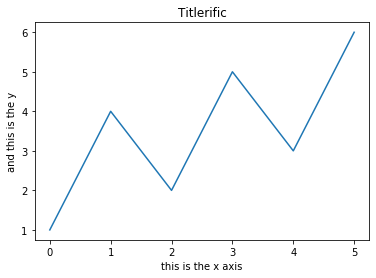

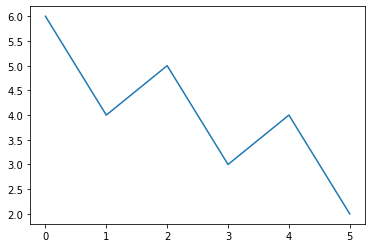

In [2]:
## Matplotlib examples:

# plt still loaded, so::

sampleData = [ 1, 4, 2, 5, 3, 6]
plt.plot( sampleData)
plt.title( 'Titlerific')
plt.xlabel( 'this is the x axis')
plt.ylabel( 'and this is the y')
plt.show()

moarData = [ 6, 4, 5, 3, 4, 2]
plt.plot( moarData)
plt.show()

Text(0.5, 0, 'And trouble')

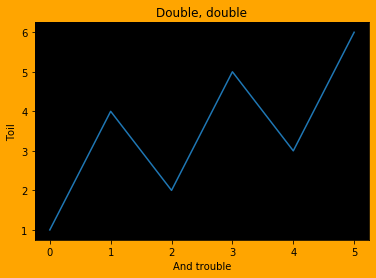

In [3]:
## Diff between the Figure and the Axis (I already knew this)

figNewton, ax = plt.subplots()

### Not a fan of the Brazilian soccer team, so changing colors

figNewton.patch.set( facecolor= 'orange')

ax.plot( sampleData)
ax.set( facecolor= 'black')     # blaaaaaaaaaaack
ax.set_title( 'Double, double')
ax.set_ylabel( 'Toil')
ax.set_xlabel( 'And trouble')

In [4]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image( url= url, width= 400)

display( example)

In [0]:
### These visualizations are reallllllllly Dark Theme Unfriendly... D:

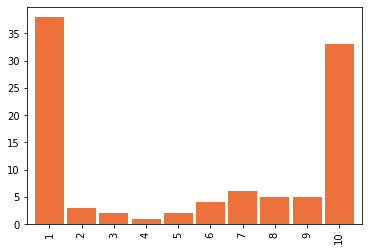

In [14]:
fake = pd.Series([ 38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index= range( 1, 11) )
fake.plot.bar( color= '#ED713A', width= 0.9);       # color C1 throws an error?
                                                    #       ¯\_(ツ)_/¯

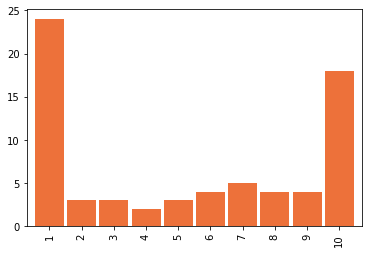

In [15]:
### Yup, copypasta'd this too:

fake2 = pd.Series(
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

### But not this:

fake2.value_counts().sort_index().plot.bar( color= '#ED713A', width= 0.9);

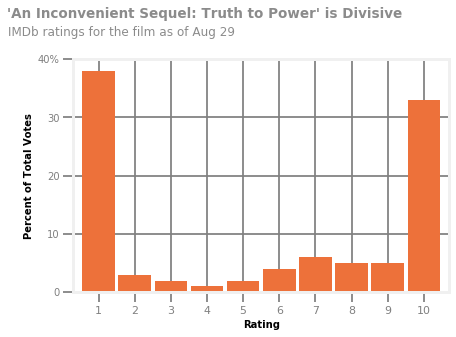

In [102]:
### ANNOTATION TIME!

plt.style.use( 'fivethirtyeight')

figNewton, ax = plt.subplots()

figNewton.patch.set( facecolor= 'none')

fake.plot.bar( width= 0.9, color= '#ED713A')

ax.set( facecolor= 'none')
ax.set_title( "'An Inconvenient Sequel: Truth to Power' is Divisive", 
             fontsize= 13.5, fontweight= 'bold', x= .35, y= 1.15, alpha= 0.45)
ax.set_ylabel( 'Percent of Total Votes', fontsize= 10, fontweight= 'semibold')
ax.set_xlabel( 'Rating', fontsize= 10, fontweight= 'demi')
ax.text( s= 'IMDb ratings for the film as of Aug 29', y= 44, x= -2.5, alpha= 0.45, 
        fontsize= 12)
ax.set_yticklabels([ '0', '10', '20', '30', '40%'], fontsize= 10, color= '0.5')
ax.set_yticks( range( 0, 50, 10) )

ax.set_xticklabels( range( 1, 11, 1), rotation= 'horizontal', fontsize= 11, 
                   color= '0.5')
ax.tick_params( axis= 'both', width= 1.75, color= '0.5', length= 10)

ax.grid( linestyle= "-", linewidth= 1.75, color= '0.5', zorder= -10)

figNewton.show()

### Can't for the life of me find a way to set the edgecolor -- everywhere I try
### to stick the kwarg, it either doesn't do anything, or throws an error.
### So, this is Good Enough for now. I'm not a fan of Good Enough, but I need to
### move on to more productive things.

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here